# Setup

In [3]:
# Common imports
import sys
import os
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dropout

# Common imports
import sys
import os
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# fetcher dataset

In [4]:
fashion_mnist = keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

## splitting the data into training set and validation set

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

# creating the models

In [6]:
# Define the model, as a CNN
#model = keras.models.Sequential()
#model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3)))
#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
#model.add(keras.layers.MaxPooling2D(pool_size=(2)))
#model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
#model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(10, activation='softmax'))


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2)))
model.add(Dropout(0.3))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                        

# compiling the model

In [7]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

# introducing callbacks

In [8]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10.keras", save_best_only=True)

# Training the model

In [9]:
# Train the model
history = model.fit(X_train_full, y_train_full, epochs=100,
                    validation_split=0.2,
                    callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
1250/1250 [==============================] - 100s 80ms/step - loss: 1.3483 - accuracy: 0.5175 - val_loss: 1.1511 - val_accuracy: 0.5997
Epoch 2/100
1250/1250 [==============================] - 97s 77ms/step - loss: 1.0030 - accuracy: 0.6471 - val_loss: 1.6837 - val_accuracy: 0.4672
Epoch 3/100
1250/1250 [==============================] - 97s 78ms/step - loss: 0.8680 - accuracy: 0.6974 - val_loss: 1.0535 - val_accuracy: 0.6342
Epoch 4/100
1250/1250 [==============================] - 96s 77ms/step - loss: 0.7847 - accuracy: 0.7275 - val_loss: 1.0769 - val_accuracy: 0.6410
Epoch 5/100
1250/1250 [==============================] - 93s 74ms/step - loss: 0.7203 - accuracy: 0.7505 - val_loss: 0.7799 - val_accuracy: 0.7331
Epoch 6/100
1250/1250 [==============================] - 94s 75ms/step - loss: 0.6744 - accuracy: 0.7666 - val_loss: 0.7403 - val_accuracy: 0.7529
Epoch 7/100
1250/1250 [==============================] - 95s 76ms/step - loss: 0.6381 - accuracy: 0.7808 - val_loss: 

# showing validation of model

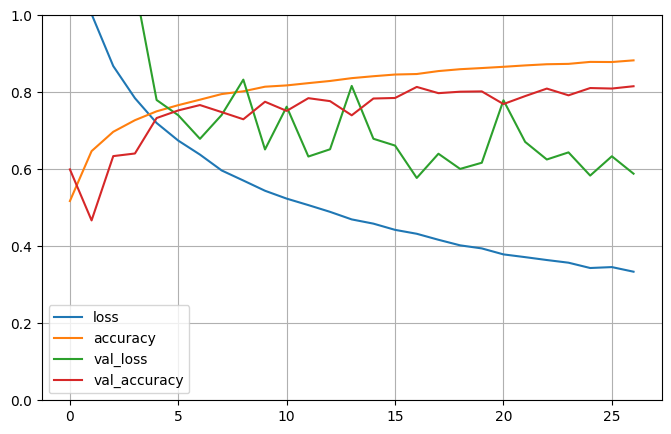

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 7s 21ms/step - loss: 3.4129 - accuracy: 0.1000


[3.412921190261841, 0.10000000149011612]

# saving the model for checkpoint usage

In [12]:
model.save("cifar10.keras")
model = keras.models.load_model("cifar10.keras")